# Pymaceuticals Inc.
---

### Analysis

Capomulin had the lowest tumor volume (22.05) at the final timepoint out of the drug list of Capomulin, 
Ramicane, Infubinol, Ceftamin.

Potential outliers for final tumor volume could be as low as 3.07 and as high as 94.04.

The mean and median for tumor volume for all drug treatments are fairly similar suggesting that potentially 
few outliers that skew the distribution.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')


# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_of_mice = combined_data_df["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989", :]
dup_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#rename columns
summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,"Median Tumor Volume": median_tumor,
                              "Tumor Volume Variance": var_tumor,"Tumor Volume Std. Dev": std_tumor,
                              "Tumor Volume Std. Err.": sem_tumor})

summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_agg_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

summary_agg_df = summary_df.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", 
                                     "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev", 
                                     "sem": "Tumor Volume Std. Err."})



summary_agg_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

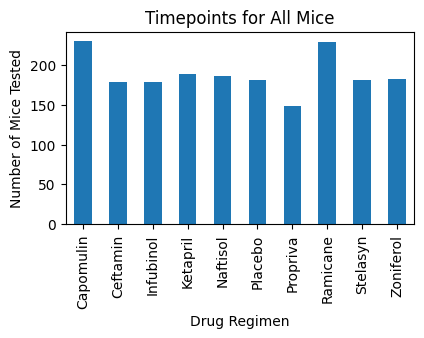

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

time_points = clean_df.groupby("Drug Regimen")["Timepoint"].count()


time_points.plot(kind="bar", figsize=(4.5,2.5))

# Set a title for the chart
plt.title("Timepoints for All Mice")
plt.ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



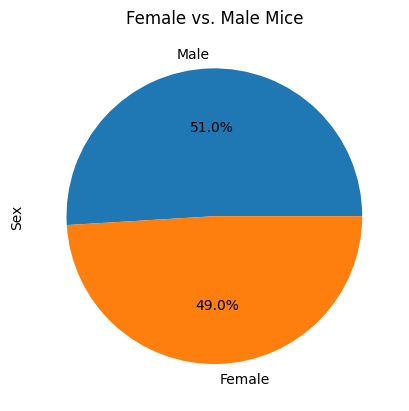

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
sex_data.plot.pie(autopct= "%1.1f%%")
plt.show()


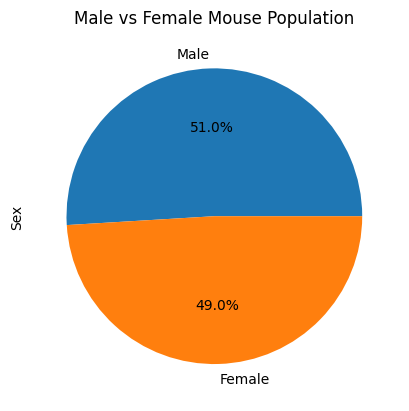

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = sex_data.plot.pie(autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:

# last_timepoint = clean_df.loc[clean_df["Timepoint"] == 45, :]

# cap_ram_inf_cef = last_timepoint.loc[(last_timepoint["Drug Regimen"] == "Capomulin")|(
#                     last_timepoint["Drug Regimen"] == "Ramicane")|(last_timepoint["Drug Regimen"] == "Infubinol")|(
#                     last_timepoint["Drug Regimen"] == "Ceftamin"), :]

#cap_ram_inf_cef

# final_tumor_vol = cap_ram_inf_cef.loc[:, ["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen"]]
# final_tumor_vol



# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
max_timepoint = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].agg('max')
#max_timepoint

final_tumor_volume = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].agg(lambda x: x.iloc[-1])


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, final_tumor_volume, on=['Mouse ID', 'Drug Regimen'])
merged_df = merged_df.reset_index()

final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(drug_list)]
final_tumor_volume.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543


In [24]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


quartiles = final_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# print(f"The lower quartile of tumor volume is: {lowerq}")
# print(f"The upper quartile of tumor volume is: {upperq}")
# print(f"The interquartile range of tumor volume is: {iqr}")
# print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


outlier = final_tumor_volume.loc[(final_tumor_volume['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_volume['Tumor Volume (mm3)'] > upper_bound)]
outlier
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)


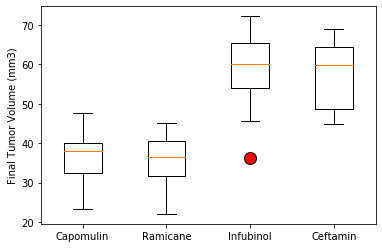

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

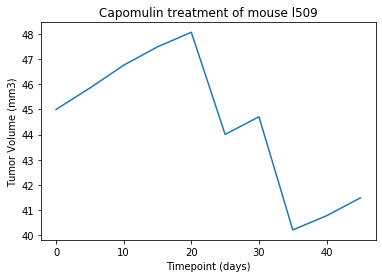

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



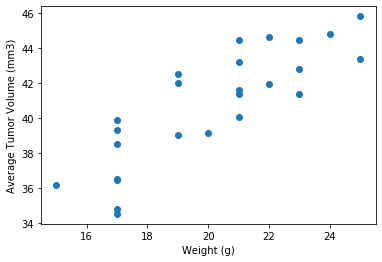

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


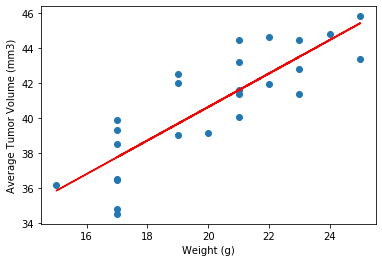

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

